In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
#載入波士頓房屋價值資料集
boston = pd.read_csv(r'C:\pyml_scripts\boston.csv')

In [4]:
type(boston)

pandas.core.frame.DataFrame

In [5]:
boston.shape

(506, 14)

In [6]:
#顯示dataframe前5筆資料
boston.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [7]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

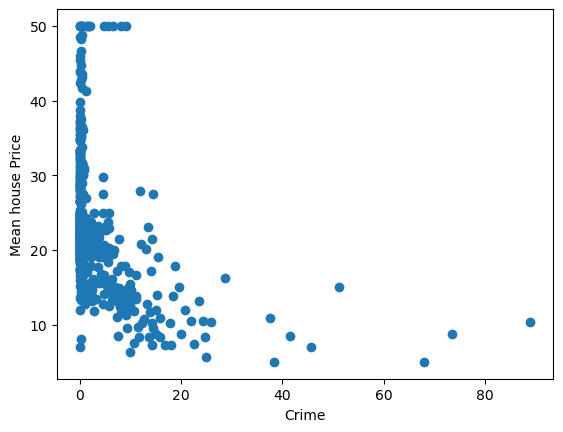

In [8]:
plt.scatter(boston['CRIM'],boston['MEDV'])
plt.xlabel('Crime')
plt.ylabel('Mean house Price')
plt.show()

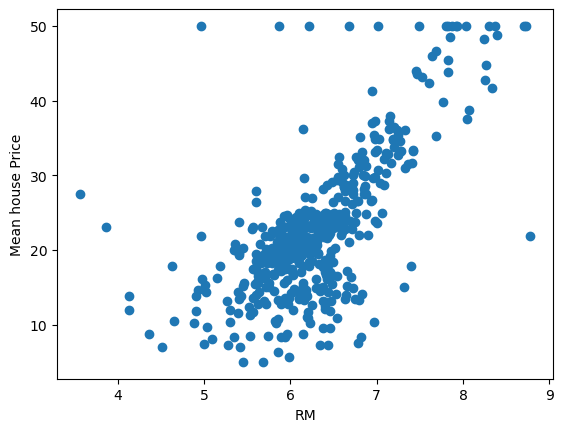

In [9]:
plt.scatter(boston['RM'],boston['MEDV'])
plt.xlabel('RM')
plt.ylabel('Mean house Price')
plt.show()

In [10]:
boston_data_df = boston.drop('MEDV',axis=1)
boston_data_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [11]:
boston_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
#檢視數字型態資料的一般統計資訊
boston_data_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

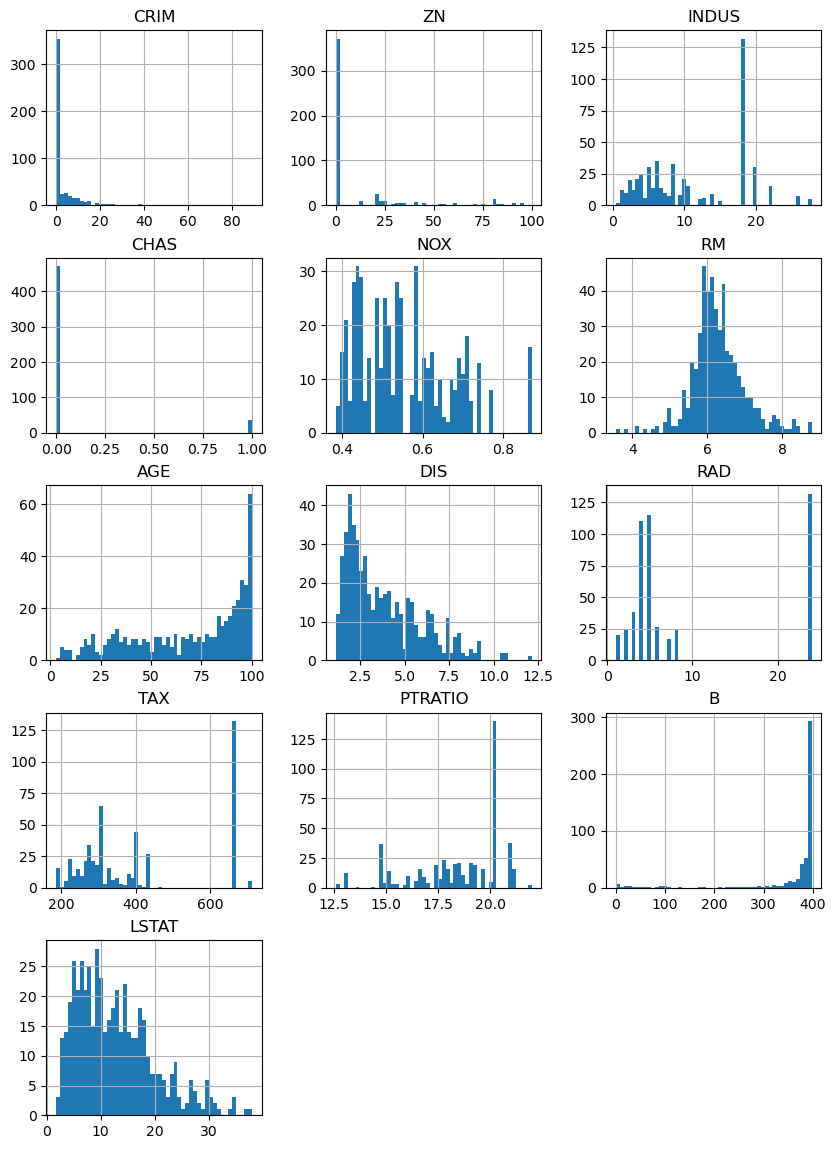

In [13]:
#直方圖
boston_data_df.hist(figsize=(10, 20), bins=50, layout=(7, 3));
plt.show()

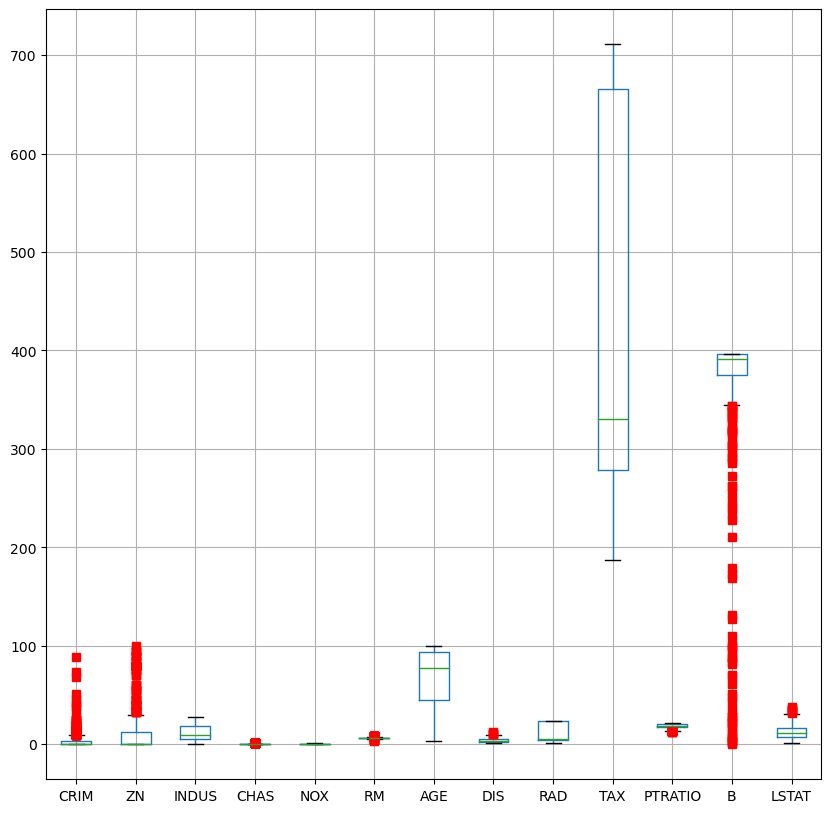

In [14]:
#使用盒型圖檢視平均值、中位數、第1/3分位數、異常值
boston_data_df.boxplot(figsize=(10,10),sym='rs')
plt.show()

In [15]:
boston_target_df = pd.DataFrame(boston,columns=['MEDV'])
boston_target_df.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [16]:
#多元迴歸需要注意多元共線性，顯示Pearson's correlation coeffience
#1.使用相關係數(correlation coefficient)是否大於0.9來判斷,Pearson product-moment correlation coefficient(皮爾森積差相關係數)
#2.使用變異數膨脹因子(variance inflation factor)是否大於10來判斷
boston.corr().style.background_gradient(cmap='RdYlGn')

In [17]:
#pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(boston.values, i) for i in range(boston.values.shape[1])]
vif["features"] = boston.columns
vif.sort_values(by="VIF Factor")

VIF Factor features
3     1.176266     CHAS
0     2.131404     CRIM
1     2.910004       ZN
12   12.615188    LSTAT
2    14.485874    INDUS
8    15.369980      RAD
7    15.430455      DIS
11   21.351015        B
6    21.398863      AGE
13   24.503206     MEDV
9    61.939713      TAX
4    74.004269      NOX
10   87.227233  PTRATIO
5   136.101743       RM

In [18]:
boston_target_df.describe()

MEDV
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000

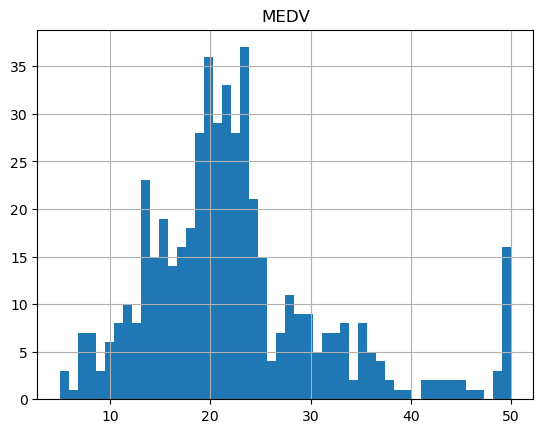

In [19]:
boston_target_df.hist(bins=50)
plt.show()

In [20]:
#將資料集分為訓練資料與測試資料(80/20)
#random_state若相同，可以確保每次執行時，訓練/測試資料都是相同分割結果
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_data_df,boston_target_df,test_size=0.2,random_state=100) 

In [21]:
print(X_train['CRIM'].count())
print(boston_data_df['CRIM'].count()*0.8)

404
404.8


In [22]:
y_train.count()

MEDV    404
dtype: int64

In [23]:
#進行訓練，使用所有特徵而且暫時不進行Normalization或Standarization
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [24]:
#訓練誤差
clf.score(X_train,y_train)

0.7337332767917557

In [25]:
#驗證所訓練的模型效果如何
#clf.score
clf.score(X_test,y_test)

0.755503308687131

In [26]:
#R2_score(決定係數:Coefficient of Determination),0~1之間,越趨近1越好.
from sklearn.metrics import r2_score
y_pred = clf.predict(X_test)
r2_score(y_test,y_pred)

0.755503308687131

In [27]:
print("係數 : ",clf.coef_)
print("截距 : ",clf.intercept_)

係數 :  [[-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
  -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
   2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
  -4.85895548e-01]]
截距 :  [36.33377029]


In [28]:
#轉換為1維陣列
boston_data_df.columns.values.reshape(-1).shape

(13,)

In [29]:
pd.DataFrame({"Name":boston_data_df.columns.values.reshape(-1),"Coefficients":clf.coef_.reshape(-1)})

Name  Coefficients
0      CRIM     -0.081490
1        ZN      0.048041
2     INDUS     -0.005472
3      CHAS      3.062606
4       NOX    -16.136881
5        RM      3.672451
6       AGE     -0.008515
7       DIS     -1.517409
8       RAD      0.287271
9       TAX     -0.012121
10  PTRATIO     -0.924161
11        B      0.009535
12    LSTAT     -0.485896

In [30]:
boston_coef_df = pd.DataFrame({"Name":boston_data_df.columns.values.reshape(-1),"Coefficients":clf.coef_.reshape(-1)})
print(boston_coef_df.sort_values(by='Coefficients'))

       Name  Coefficients
4       NOX    -16.136881
7       DIS     -1.517409
10  PTRATIO     -0.924161
12    LSTAT     -0.485896
0      CRIM     -0.081490
9       TAX     -0.012121
6       AGE     -0.008515
2     INDUS     -0.005472
11        B      0.009535
1        ZN      0.048041
8       RAD      0.287271
3      CHAS      3.062606
5        RM      3.672451


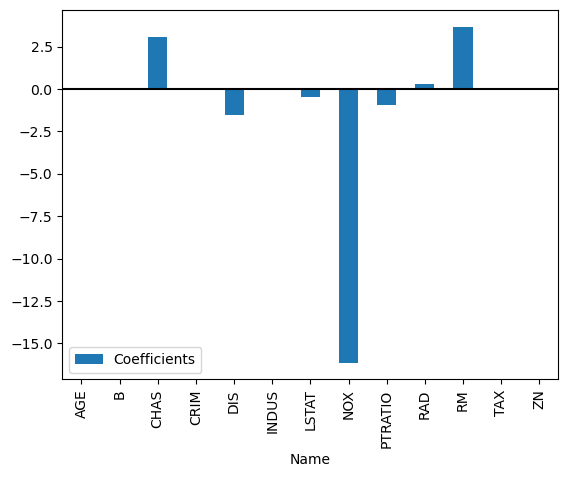

In [31]:
boston_coef_df.groupby('Name').sum().plot(kind='bar')
ax = plt.axhline(y=0,color='black')
plt.show()

In [32]:
from sklearn.linear_model import Ridge
clf_r = Ridge()
clf_r.fit(X_train,y_train)
clf_r.score(X_test,y_test)

0.7500978146031212

In [33]:
from sklearn.linear_model import Lasso
clf_l = Lasso()
clf_l.fit(X_train,y_train)
clf_l.score(X_test,y_test)

0.6776294232065303

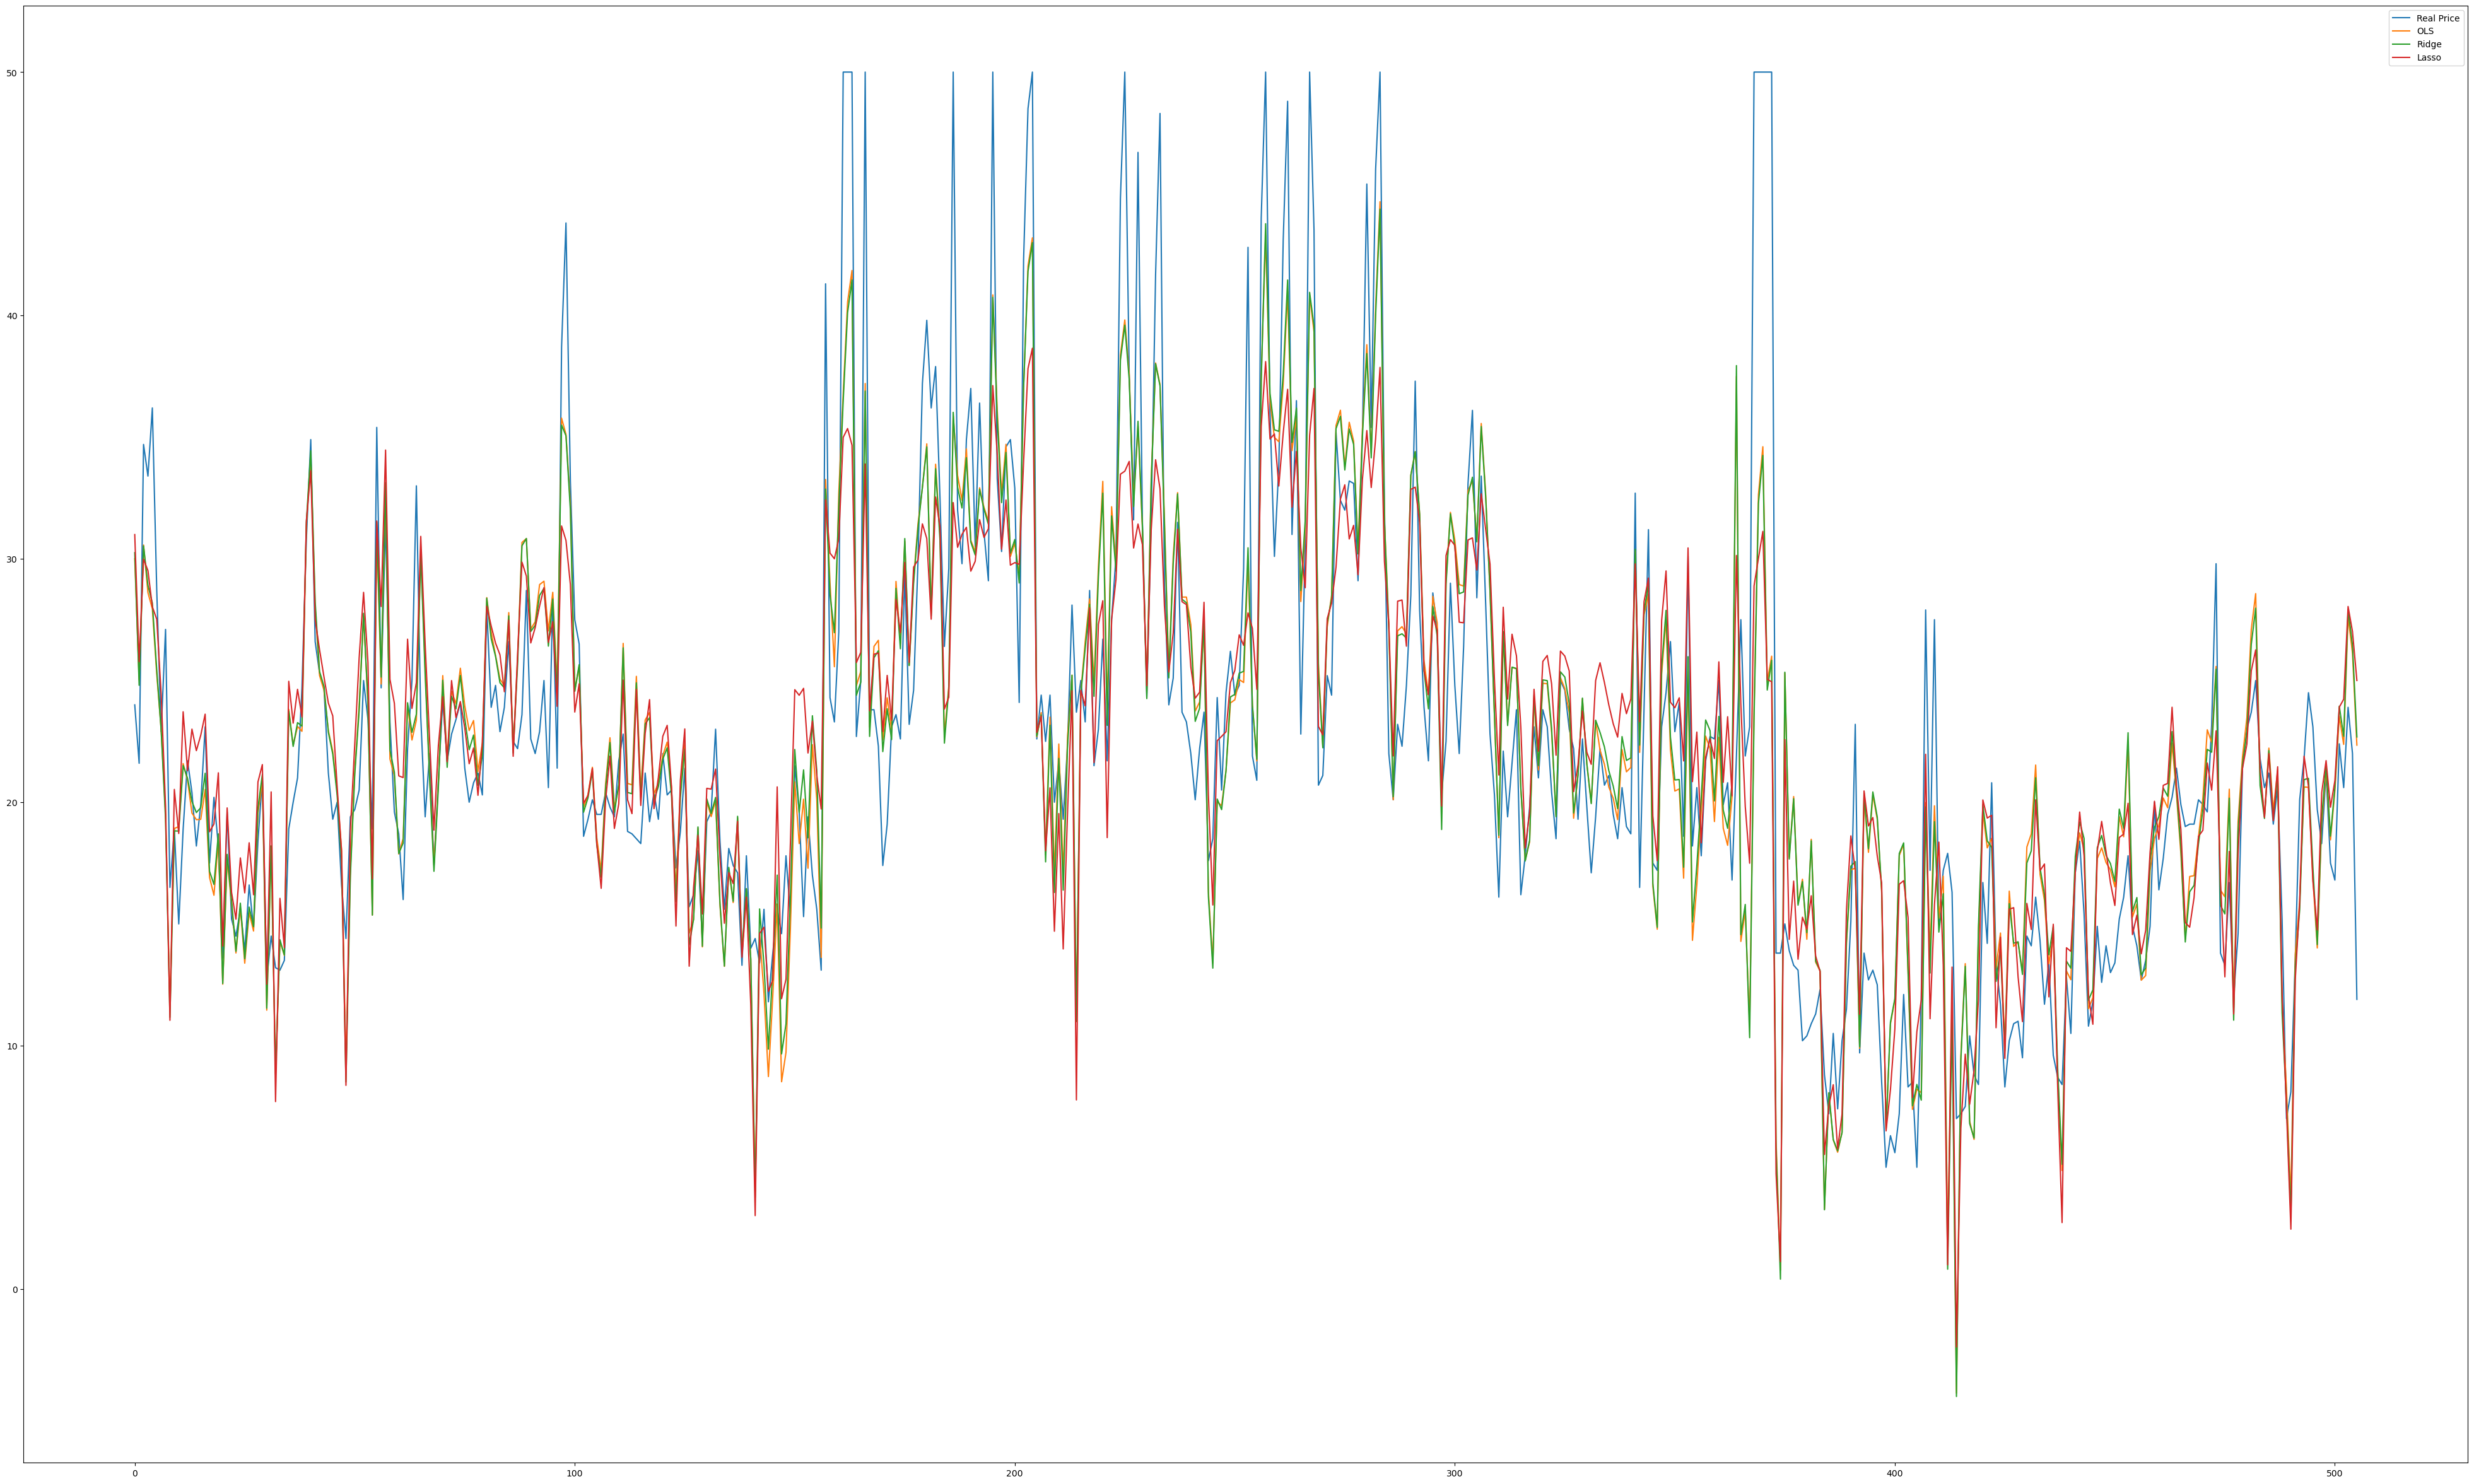

In [34]:
#顯示OLS/Ridge/Lasso迴歸的正確性
clf = LinearRegression()
clf_r = Ridge()
clf_l = Lasso()
clf.fit(boston_data_df,boston_target_df)
clf_r.fit(boston_data_df,boston_target_df)
clf_l.fit(boston_data_df,boston_target_df)
boston_target_pred = clf.predict(boston_data_df)
boston_target_pred_r = clf_r.predict(boston_data_df)
boston_target_pred_l = clf_l.predict(boston_data_df)
plt.figure(figsize=(50,30))
plt.plot(boston_target_df,label='Real Price')
plt.plot(boston_target_pred,label='OLS')
plt.plot(boston_target_pred_r,label='Ridge')
plt.plot(boston_target_pred_l,label='Lasso')
plt.legend()
plt.show()

In [35]:
print(clf.score(boston_data_df,boston_target_df))
print(clf_r.score(boston_data_df,boston_target_df))
print(clf_l.score(boston_data_df,boston_target_df))

0.7406426641094095
0.7388703133867616
0.6825842212709925


In [36]:
boston_data_df.iloc[200].values.reshape(1,-1)

array([[1.7780e-02, 9.5000e+01, 1.4700e+00, 0.0000e+00, 4.0300e-01,
        7.1350e+00, 1.3900e+01, 7.6534e+00, 3.0000e+00, 4.0200e+02,
        1.7000e+01, 3.8430e+02, 4.4500e+00]])

In [37]:
print(clf.predict(boston_data_df.iloc[200].values.reshape(1,-1)))
print(boston_target_df.iloc[200,-1])

[[30.64393906]]
32.9


C:\Users\Admin\anaconda3\envs\PyML\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
#顯示模型所使用的係數與截距
print(clf.coef_)
print(clf.intercept_)

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
[36.45948839]


In [39]:
pd.DataFrame({"Name":boston_data_df.columns.values.reshape(-1),"Coefficients":clf.coef_.reshape(-1)})

Name  Coefficients
0      CRIM     -0.108011
1        ZN      0.046420
2     INDUS      0.020559
3      CHAS      2.686734
4       NOX    -17.766611
5        RM      3.809865
6       AGE      0.000692
7       DIS     -1.475567
8       RAD      0.306049
9       TAX     -0.012335
10  PTRATIO     -0.952747
11        B      0.009312
12    LSTAT     -0.524758

In [40]:
boston_coef_df = pd.DataFrame({"Name":boston_data_df.columns.values.reshape(-1),"Coefficients":clf.coef_.reshape(-1)})
print(boston_coef_df.sort_values(by='Coefficients'))

       Name  Coefficients
4       NOX    -17.766611
7       DIS     -1.475567
10  PTRATIO     -0.952747
12    LSTAT     -0.524758
0      CRIM     -0.108011
9       TAX     -0.012335
6       AGE      0.000692
11        B      0.009312
2     INDUS      0.020559
1        ZN      0.046420
8       RAD      0.306049
3      CHAS      2.686734
5        RM      3.809865


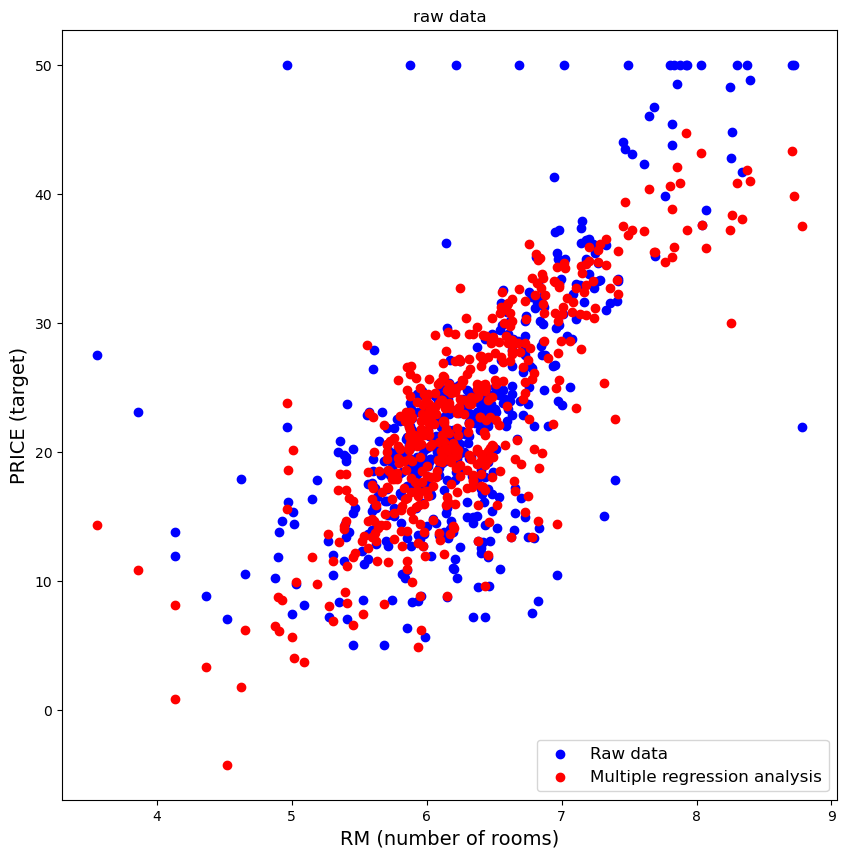

In [41]:
plt.figure(figsize=(10,10))
plt.title('raw data')
plt.xlabel('RM (number of rooms)', fontsize=14)
plt.ylabel('PRICE (target)', fontsize=14)
plt.scatter(boston_data_df["RM"], boston_target_df["MEDV"], c='blue', label='Raw data')
plt.scatter(boston_data_df["RM"], clf.predict(boston_data_df), c='red', label='Multiple regression analysis')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [42]:
#利用K-Fold方式，使用所有資料當作訓練集。cv=10表示分成10小份，一共訓練10次，每次使用9份當作訓練集，1份當作測試集
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
clf = LinearRegression()
boston_target_score_cv = cross_val_score(clf, boston_data_df, boston_target_df,cv=10)
#boston_target_pred_cv = cross_val_predict(clf, boston.data, boston.target,cv=10)
print(boston_target_score_cv)

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]


In [43]:
#特徵縮放,將不同特徵的不同單位與量綱去除
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import Normalizer

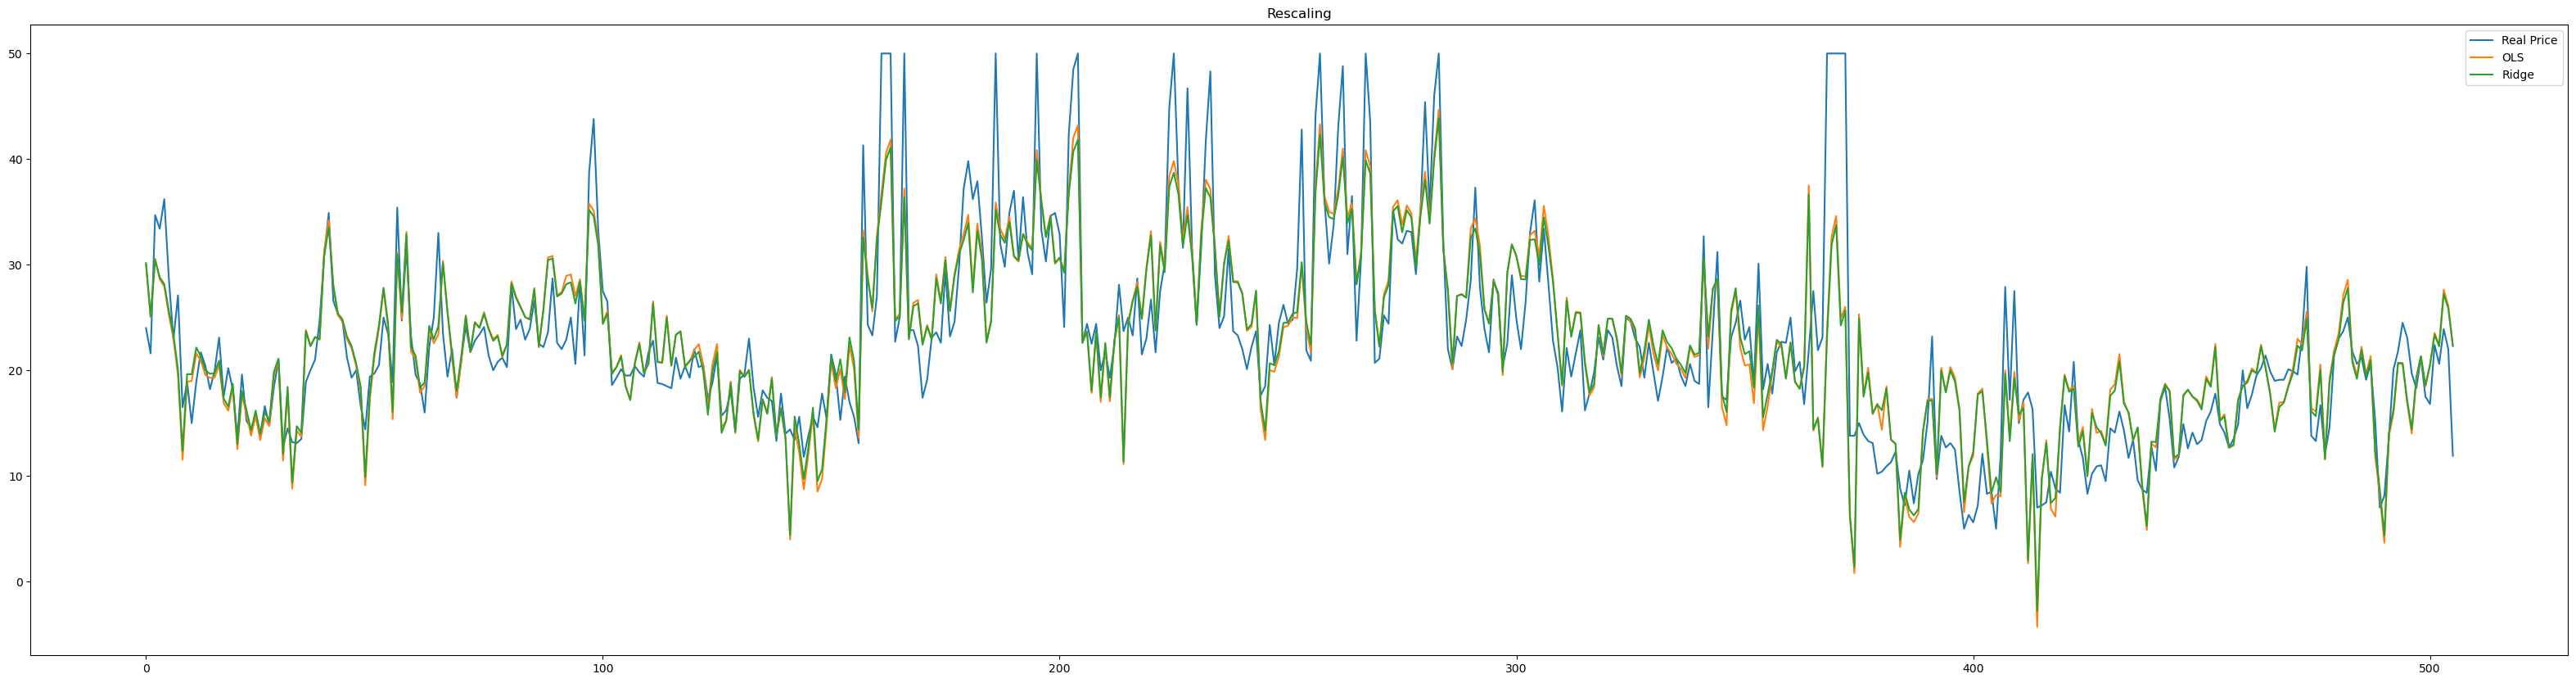

In [44]:
#使用MinMaxScaler進行Rescaling
boston_minmax = MinMaxScaler()
boston_data_minmax = boston_minmax.fit_transform(boston_data_df.values)
boston_target_minmax = boston_minmax.fit_transform(boston_target_df.values.reshape(-1,1))

clf_minmax = LinearRegression()
clf_minmax_r = Ridge()
clf_minmax_l = Lasso()

clf_minmax.fit(boston_data_minmax,boston_target_minmax)
clf_minmax_r.fit(boston_data_minmax,boston_target_minmax)
clf_minmax_l.fit(boston_data_minmax,boston_target_minmax)

#請注意需要將預測值回復為MinMaxScaler之前的值
boston_target_pred = boston_minmax.inverse_transform(clf_minmax.predict(boston_data_minmax))
boston_target_pred_r = boston_minmax.inverse_transform(clf_minmax_r.predict(boston_data_minmax))
#boston_target_pred_l = boston_minmax.inverse_transform(clf_minmax_l.predict(boston_data_minmax))

plt.figure(figsize=(40,10))
plt.title('Rescaling')
plt.plot(boston_target_df,label='Real Price')
plt.plot(boston_target_pred,label='OLS')
plt.plot(boston_target_pred_r,label='Ridge')
#plt.plot(boston_target_pred_l,label='Lasso')
plt.legend()
plt.show()

In [45]:
boston_data_df.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [46]:
boston_data_minmax[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [47]:
print(clf_minmax.score(boston_data_minmax,boston_target_minmax))
print(clf_minmax_r.score(boston_data_minmax,boston_target_minmax))
print(clf_minmax_l.score(boston_data_minmax,boston_target_minmax))

0.7406426641094094
0.7378602305895288
0.0


In [48]:
boston_coef_df_minmax = pd.DataFrame({"Name":boston_data_df.columns.values.reshape(-1),"Coefficients":clf_minmax.coef_.reshape(-1)})
print(boston_coef_df_minmax.sort_values(by='Coefficients'))

       Name  Coefficients
12    LSTAT     -0.422605
7       DIS     -0.360592
0      CRIM     -0.213550
10  PTRATIO     -0.199018
4       NOX     -0.191879
9       TAX     -0.143629
6       AGE      0.001494
2     INDUS      0.012463
3      CHAS      0.059705
11        B      0.082063
1        ZN      0.103157
8       RAD      0.156425
5        RM      0.441860


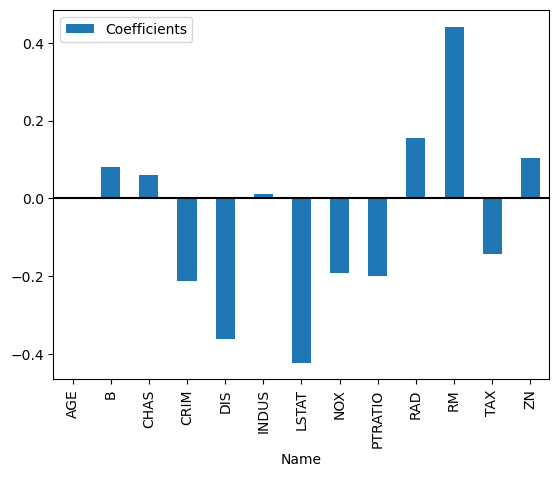

In [49]:
boston_coef_df_minmax.groupby('Name').sum().plot(kind='bar')
ax = plt.axhline(y=0,color='black')
plt.show()

In [50]:
print(boston_minmax.inverse_transform(clf_minmax.predict(boston_data_minmax[200].reshape(1,-1))))
print(boston_target_df.iloc[200])

[[30.64393906]]
MEDV    32.9
Name: 200, dtype: float64


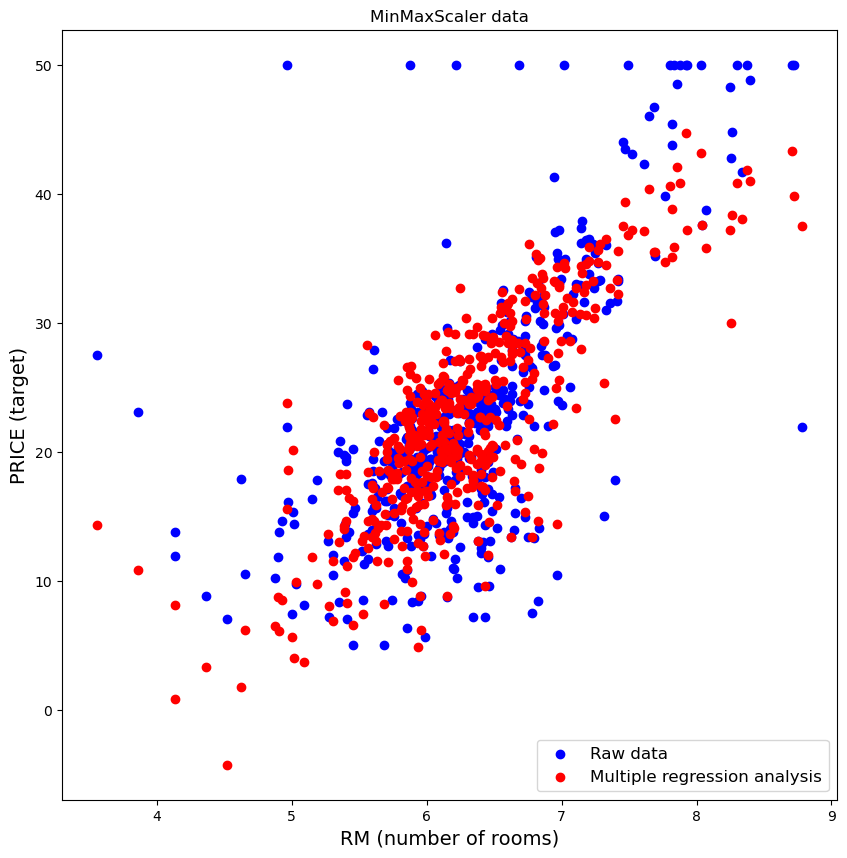

In [51]:
plt.figure(figsize=(10,10))
plt.title('MinMaxScaler data')
plt.xlabel('RM (number of rooms)', fontsize=14)
plt.ylabel('PRICE (target)', fontsize=14)
plt.scatter(boston_data_df["RM"], boston_target_df["MEDV"], c='blue', label='Raw data')
plt.scatter(boston_data_df["RM"], boston_target_pred, c='red', label='Multiple regression analysis')
plt.legend(loc='lower right', fontsize=12)
plt.show()

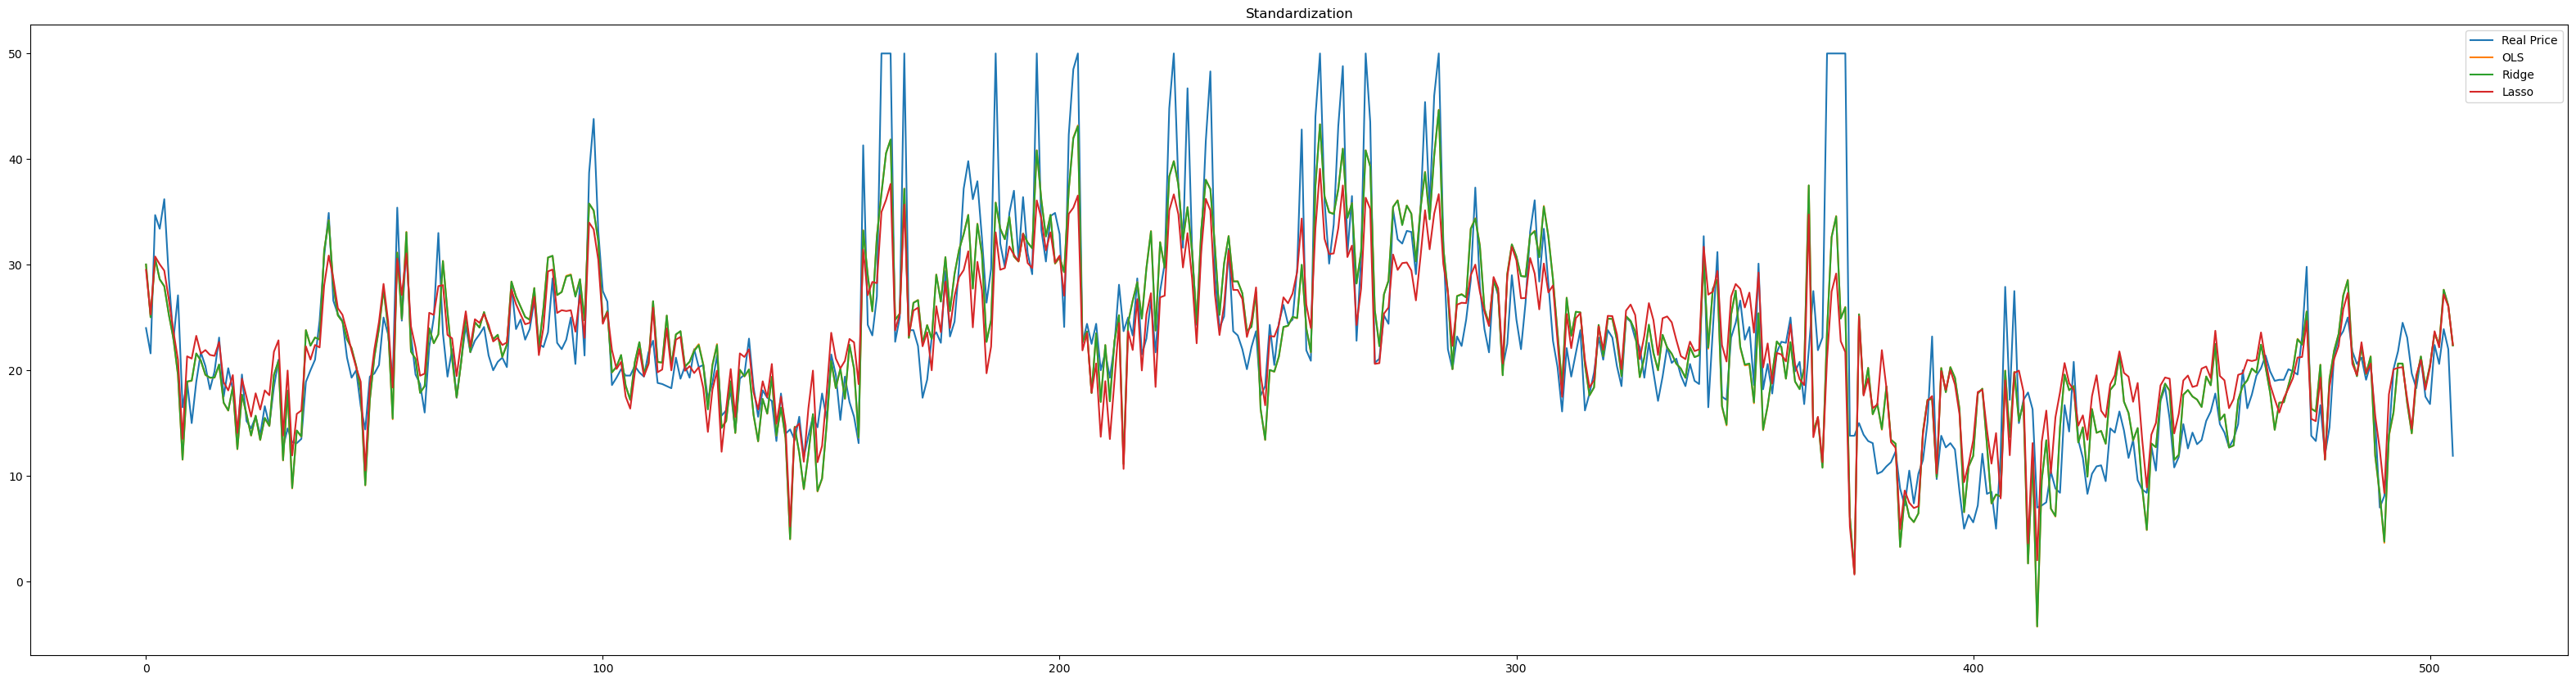

In [52]:
#使用StandardScaler進行Standardization(為何不用Normalization?因為Normalizer沒辦法轉換為原始值)
boston_std = StandardScaler()
boston_data_std= boston_std.fit_transform(boston_data_df.values)

#boston_target_std = boston_std.fit_transform(boston.target.reshape(-1,1))
#理論上target可以不需要進行無量綱化
boston_target = boston_target_df.values
clf_std = LinearRegression()
clf_std_r = Ridge()
clf_std_l = Lasso()
#clf_std.fit(boston_data_std,boston_target_std)
#clf_std_r.fit(boston_data_std,boston_target_std)
#clf_std_l.fit(boston_data_std,boston_target_std)

clf_std.fit(boston_data_std,boston_target)
clf_std_r.fit(boston_data_std,boston_target)
clf_std_l.fit(boston_data_std,boston_target)

#boston_target_pred = boston_std.inverse_transform(clf_std.predict(boston_data_std))
#boston_target_pred_r = boston_std.inverse_transform(clf_std_r.predict(boston_data_std))
#boston_target_pred_l = boston_std.inverse_transform(clf_std_l.predict(boston_data_std))

boston_target_pred = clf_std.predict(boston_data_std)
boston_target_pred_r = clf_std_r.predict(boston_data_std)
boston_target_pred_l = clf_std_l.predict(boston_data_std)

plt.figure(figsize=(40,10))
plt.title('Standardization')
plt.plot(boston_target_df,label='Real Price')
plt.plot(boston_target_pred,label='OLS')
plt.plot(boston_target_pred_r,label='Ridge')
plt.plot(boston_target_pred_l,label='Lasso')
plt.legend()
plt.show()

In [53]:
print(clf_std.score(boston_data_std,boston_target))
print(clf_std_r.score(boston_data_std,boston_target))
print(clf_std_l.score(boston_data_std,boston_target))

0.7406426641094095
0.7406304514762485
0.6628192101128285


In [54]:
boston_coef_df_std = pd.DataFrame({"Name":boston_data_df.columns.values.reshape(-1),"Coefficients":clf_std.coef_.reshape(-1)})
print(boston_coef_df_std.sort_values(by='Coefficients'))

       Name  Coefficients
12    LSTAT     -3.743627
7       DIS     -3.104044
9       TAX     -2.076782
10  PTRATIO     -2.060607
4       NOX     -2.056718
0      CRIM     -0.928146
6       AGE      0.019466
2     INDUS      0.140900
3      CHAS      0.681740
11        B      0.849268
1        ZN      1.081569
8       RAD      2.662218
5        RM      2.674230


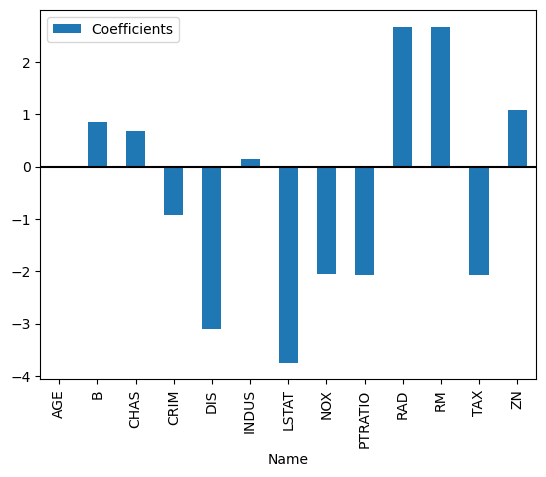

In [55]:
boston_coef_df_std.groupby('Name').sum().plot(kind='bar')
ax = plt.axhline(y=0,color='black')
plt.show()

In [56]:
print(clf_minmax.predict(boston_data_std[200].reshape(1,-1)))
print(boston_target_df.iloc[200])

[[1.5609818]]
MEDV    32.9
Name: 200, dtype: float64


In [57]:
#將類別行資料使用ONE Hot Encoding方式編碼，這裡使用pandas的get_dummies函數
boston_data_dummy_df = pd.get_dummies(boston_data_df,columns=["CHAS"])

In [58]:
boston_data_dummy_df.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  CHAS_0.0  CHAS_1.0  
0  396.90   4.98         1         0  
1  396.90   9.14         1         0  
2  392.83   4.03         1         0  
3  394.63   2.94         1         0  
4  396.90   5.33         1         0

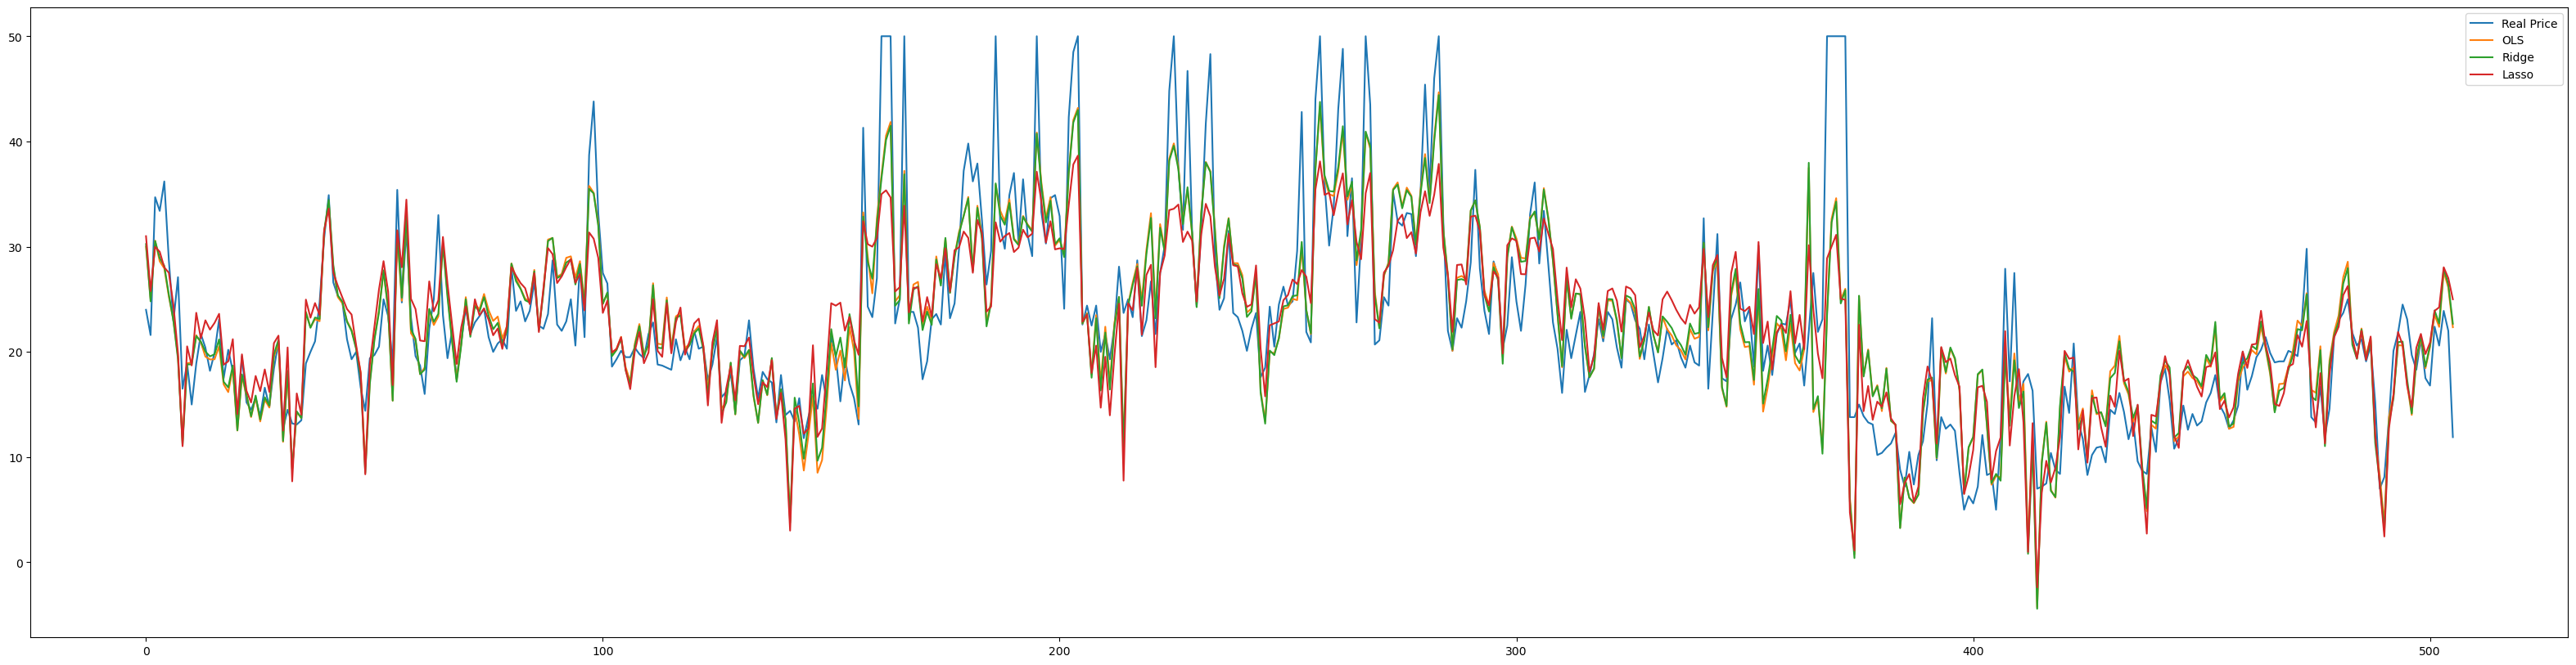

In [59]:
clf = LinearRegression()
clf_r = Ridge()
clf_l = Lasso()
clf.fit(boston_data_dummy_df,boston_target_df)
clf_r.fit(boston_data_dummy_df,boston_target_df)
clf_l.fit(boston_data_dummy_df,boston_target_df)
boston_target_pred = clf.predict(boston_data_dummy_df)
boston_target_pred_r = clf_r.predict(boston_data_dummy_df)
boston_target_pred_l = clf_l.predict(boston_data_dummy_df)
plt.figure(figsize=(40,10))
plt.plot(boston_target_df,label='Real Price')
plt.plot(boston_target_pred,label='OLS')
plt.plot(boston_target_pred_r,label='Ridge')
plt.plot(boston_target_pred_l,label='Lasso')
plt.legend()
plt.show()

In [60]:
print(clf.score(boston_data_dummy_df,boston_target_df))
print(clf_r.score(boston_data_dummy_df,boston_target_df))
print(clf_l.score(boston_data_dummy_df,boston_target_df))

0.7406426641094094
0.7388757741549805
0.6825842212709925


In [61]:
print(clf.predict(boston_data_dummy_df.iloc[200].values.reshape(1,-1)))
print(boston_target_df.iloc[200])

[[30.64393906]]
MEDV    32.9
Name: 200, dtype: float64


C:\Users\Admin\anaconda3\envs\PyML\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [62]:
#pandas擷取部分特徵來訓練模型，使用正面表列方式,將所要特徵名字列在["name1","name2"]之內即可
boston_data_small_df = boston_data_df[["CRIM","DIS","TAX","RM","LSTAT","PTRATIO","RAD"]]

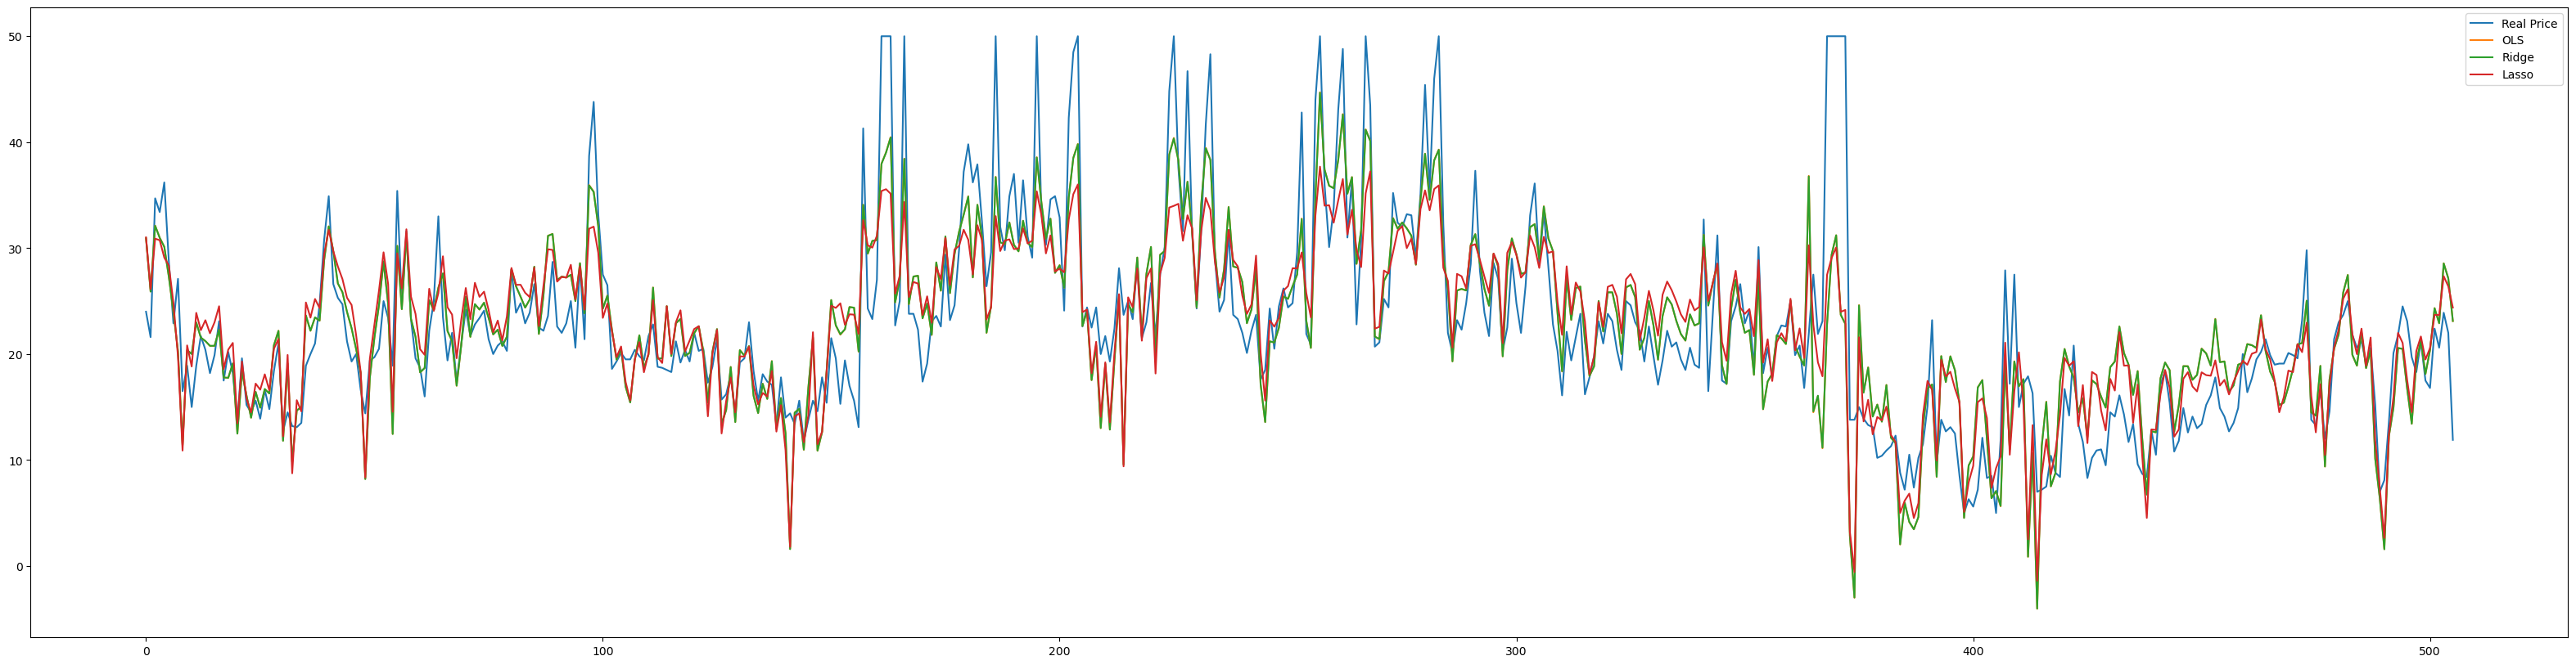

In [63]:
clf = LinearRegression()
clf_r = Ridge()
clf_l = Lasso()
clf.fit(boston_data_small_df,boston_target_df)
clf_r.fit(boston_data_small_df,boston_target_df)
clf_l.fit(boston_data_small_df,boston_target_df)
boston_target_pred = clf.predict(boston_data_small_df)
boston_target_pred_r = clf_r.predict(boston_data_small_df)
boston_target_pred_l = clf_l.predict(boston_data_small_df)
plt.figure(figsize=(40,10))
plt.plot(boston_target_df,label='Real Price')
plt.plot(boston_target_pred,label='OLS')
plt.plot(boston_target_pred_r,label='Ridge')
plt.plot(boston_target_pred_l,label='Lasso')
plt.legend()
plt.show()

In [64]:
print(clf.score(boston_data_small_df,boston_target_df))
print(clf_r.score(boston_data_small_df,boston_target_df))
print(clf_l.score(boston_data_small_df,boston_target_df))

0.7072918291155035
0.7072892554927243
0.6698983460563297


In [65]:
print(clf.predict(boston_data_small_df.iloc[200].values.reshape(1,-1)))
print(boston_target_df.iloc[200])

[[28.39452493]]
MEDV    32.9
Name: 200, dtype: float64


C:\Users\Admin\anaconda3\envs\PyML\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
from sklearn.linear_model import RidgeCV  

#使用多個alpha進行多次學習
clf_r_cv = RidgeCV(alphas=np.array([.1, .2, .3, .4])) 
clf_r_cv.fit(boston_data_df,boston_target_df)

#訓練後所得到alpha_是訓練時所帶入alpha中最佳者
clf_r_cv.alpha_

0.1

In [67]:
clf_r_cv.score(boston_data_df,boston_target_df)

0.7406002922228028

In [68]:
#以此類推，找出最佳alpha值
clf_r_cv = RidgeCV(alphas=np.array([.07, .08, .09,0.1])) 
clf_r_cv.fit(boston_data_df,boston_target_df)
clf_r_cv.alpha_

0.07

In [69]:
clf_r_cv = RidgeCV(alphas=np.array([.05, .06, .07])) 
clf_r_cv.fit(boston_data_df,boston_target_df)
clf_r_cv.alpha_

0.05

In [70]:
clf_r_cv = RidgeCV(alphas=np.array([.02, .03, .04])) 
clf_r_cv.fit(boston_data_df,boston_target_df)
clf_r_cv.alpha_

0.04

In [71]:
clf_r_cv = RidgeCV(alphas=np.array([.035, .037, .039])) 
clf_r_cv.fit(boston_data_df,boston_target_df)
clf_r_cv.alpha_

0.037

In [72]:
clf_r_cv.score(boston_data_df,boston_target_df)

0.7406363922283545